In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip install langdetect

In [ ]:
pip install googletrans==3.1.0a0

In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords
import nltk
from numpy import mean
import numpy as np

In [ ]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.6/414.6 KB 19.4 MB/s eta 0:00:00


In [ ]:
import prince

#### merging

In [ ]:
CA=pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/CA_youtube_trending_data.csv")
CA['country']='CA'

In [ ]:
CA['Category_Title'].unique()

array(['Music', 'Entertainment', 'Gaming', 'People & Blogs',
       'Howto & Style', 'Education', 'Sports', 'Autos & Vehicles',
       'News & Politics', 'Science & Technology', 'Film & Animation',
       'Comedy', 'Travel & Events', 'Pets & Animals', nan], dtype=object)

In [ ]:
CA[CA['categoryId']==28]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Category_Title,country
20,vePc5V4h_kg,Shark Attack Test- Human Blood vs. Fish Blood,2020-08-09T16:00:11Z,UCY1kMZp36IQSyNx_9h4mpCg,Mark Rober,28,2020-08-12T00:00:00Z,sharks|sharkweek|jaws|shark attack|blood in wa...,14684474,544046,15818,33508,https://i.ytimg.com/vi/vePc5V4h_kg/default.jpg,False,False,I personally got in the water and tested if Sh...,Science & Technology,CA
38,zHPVGSwLhcg,Unboxing Apple's $129 Luxury Cable,2020-08-11T14:42:43Z,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,28,2020-08-12T00:00:00Z,unbox therapy|unboxtherapy|tech|technology|gad...,998199,60995,8847,13809,https://i.ytimg.com/vi/zHPVGSwLhcg/default.jpg,False,False,ShhhhFOLLOW ME IN THESE PLACES FOR UPDATES\rTw...,Science & Technology,CA
53,QMln_LknyKU,Forget PS5. You want THIS,2020-08-11T18:41:23Z,UC9fSZHEh6XsRpX-xJc6lT3A,UrAvgConsumer,28,2020-08-12T00:00:00Z,uravgconsumer|uac|your average consumer|gaming...,128803,7554,911,1456,https://i.ytimg.com/vi/QMln_LknyKU/default.jpg,False,False,I just found my new favorite gaming laptop. Th...,Science & Technology,CA
74,KmVG1Yx1kwQ,3 DAYS with the Samsung Galaxy Note 20 Ultra! ...,2020-08-10T18:28:55Z,UCzlXf-yUIaOpOjEjPrOO9TA,The Tech Chap,28,2020-08-12T00:00:00Z,note 20 ultra|galaxy note 20 ultra|samsung gal...,285517,6771,254,1463,https://i.ytimg.com/vi/KmVG1Yx1kwQ/default.jpg,False,False,What's it like using the Samsung Galaxy Note 2...,Science & Technology,CA
190,gQWf6XpOrXI,Ils nous écoutent par nos téléphones !?,2020-08-07T16:00:16Z,UCWnfDPdZw6A23UtuBpYBbAg,Dr Nozman,28,2020-08-12T00:00:00Z,dr nozman|nozman|science,549819,45547,1249,2097,https://i.ytimg.com/vi/gQWf6XpOrXI/default.jpg,False,False,Ils nous écoutent par nos téléphones ?DROP 2 :...,Science & Technology,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187813,9irICRnszOc,Primitive Technology: Iron Bacteria Cement (no...,2023-03-02T22:03:02Z,UCAL3JXZSzSm8AlZyD3nQdBA,Primitive Technology,28,2023-03-05T00:00:00Z,primitive technology|primitive|technology|tech...,1035785,61772,0,2340,https://i.ytimg.com/vi/9irICRnszOc/default.jpg,False,False,Primitive Technology: Iron Bacteria Cement (no...,Science & Technology,CA
187817,Z2VlaplYass,6 MENSONGES sur l'HYGIÈNE 🛁,2023-03-02T16:57:03Z,UCA9IJ0GhYcbSst7C6cQWrKw,Science Trash,28,2023-03-05T00:00:00Z,science|hygiène|odeur|savon|poil|shampoing|gel...,809746,45496,0,915,https://i.ytimg.com/vi/Z2VlaplYass/default.jpg,False,False,Sortir avec une personne sale qui n’utilise ni...,Science & Technology,CA
187839,OXJAXlw2LcI,building Moon Shoes that actually Jump High,2023-03-02T04:04:00Z,UCVS89U86PwqzNkK2qYNbk5A,Allen Pan,28,2023-03-05T00:00:00Z,[None],525202,45623,0,2188,https://i.ytimg.com/vi/OXJAXlw2LcI/default.jpg,False,False,Get PayPal Honey for FREE today ▸ https://join...,Science & Technology,CA
187900,d8bZCve_ZKA,I'm NOT Stupid,2023-02-28T00:12:12Z,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,28,2023-03-05T00:00:00Z,LTT|Lab|Linus Media Group|Testing Facility|Ind...,2747559,123483,0,7514,https://i.ytimg.com/vi/d8bZCve_ZKA/default.jpg,False,False,White noise is the right noise! Check out the ...,Science & Technology,CA


In [ ]:
def dups_drop(CA):
  CA['trending_date']=pd.to_datetime(CA['trending_date'])
  CA['trend_year'] = CA['trending_date'].dt.year
  CA['trend_month'] = CA['trending_date'].dt.month
  CA.sort_values(['trending_date'],inplace=True)
  CA.drop_duplicates('video_id',keep="last",inplace=True)
  return(CA)

In [ ]:
GB = pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/GB_youtube_trending_data.csv")
GB['country']='GB'
IN = pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/IN_youtube_trending_data.csv")
IN['country']='IN'
US = pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/US_youtube_trending_data.csv")
US['country']='US'
df=pd.DataFrame()
for i in [CA,GB,IN,US]:
  df=df.append(dups_drop(i))


In [ ]:
df.shape

(158590, 20)

In [ ]:
df.to_csv("/content/drive/MyDrive/Data Mining Assignment/merged_data.csv",index=False)

#### Filtering

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/merged_data.csv", lineterminator='\n')

In [ ]:
df.shape

(158590, 20)

In [ ]:
## Extracting only english titles with the help of language detector
from langdetect import detect
detect(df['title'][0])

'en'

In [ ]:
# def lang_det(x):
#   try :
#     d=detect(x)
#     return(d) 
#   except : 
#     return("nan")
# df['language']=df['title'].apply(lambda x:lang_det(x))

from googletrans import Translator
translator = Translator()

def lang_det(x):
  try :
    d=translator.detect(x)
    return(d.lang) 
  except : 
    return("nan")
df['language']=df['title'].apply(lambda x:lang_det(x))

In [ ]:
df.to_csv("/content/drive/MyDrive/Data Mining Assignment/merged_data_with_lang.csv",index=False)

In [ ]:
df_eng=df[df['language']=='en']

In [ ]:
df_eng.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'Category_Title', 'country',
       'trend_year', 'trend_month', 'language'],
      dtype='object')

In [ ]:
### subsetting only rows with max views
df_eng.sort_values(['view_count'],inplace=True,ascending=True)
df_eng.drop_duplicates('video_id',keep="last",inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


#### Title Feature creation

In [ ]:
#df_eng.to_csv("/content/drive/MyDrive/Data Mining Assignment/english only data_base.csv",index=False)
df_eng=pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/english only data_base.csv",lineterminator='\n')
df_eng.reset_index(inplace=True,drop=True)

In [ ]:

nltk.download('stopwords')
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
stops = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_eng["#punctuation_title"]=df_eng.title.apply(lambda x:count(x,set(string.punctuation)))
df_eng['#characters']= df_eng['title'].str.len()
df_eng["#capital_words"]=df_eng.title.apply(lambda x:sum(map(str.isupper, x.split())))
df_eng["#lower_words"]=df_eng.title.apply(lambda x:sum(map(str.islower, x.split())))
df_eng["#words"]=df_eng.title.apply(lambda x:len(x.split()))
df_eng["#stop_words"]=df_eng.title.apply(lambda x:sum([1 if i in stops else 0 for i in x.lower().split()]))
df_eng["Avg_word_len"]= df_eng.title.apply(lambda x:mean([len(i) for i in x.lower().split()]))
df_eng["contains_digit"]=df_eng.title.apply(lambda x:any([1 if i.isdigit() else 0 for i in x])).astype(int)
df_eng['ratio_stopwords']=df_eng['#stop_words']/df_eng['#words']
df_eng['ratio_punctuation']=df_eng['#punctuation_title']/df_eng["#words"]
df_eng['start_with_digit']= df_eng.title.apply(lambda x:1 if x[0].isdigit() else 0).astype(int)

In [ ]:
#df_eng.to_csv("/content/drive/MyDrive/Data Mining Assignment/eng_data_base_title_features.csv",index=False)

#### Date Features

In [ ]:
df_eng['ts_utc'] = pd.to_datetime(df_eng['publishedAt'], utc=True, infer_datetime_format=True)
df_eng['day'] = df_eng['ts_utc'].dt.day
df_eng['day'] = df_eng['day'].astype('category')

# It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.
df_eng['day_of_the_week'] = df_eng['ts_utc'].apply(lambda x: x.dayofweek)
df_eng['day_of_the_week'] = df_eng['day_of_the_week'].astype('category')

df_eng['day_of_year'] = df_eng['ts_utc'].apply(lambda x: x.dayofyear)
df_eng['day_of_year'] = df_eng['day_of_year'].astype('category')

df_eng['quarter'] = df_eng['ts_utc'].apply(lambda x: x.quarter)
df_eng['quarter'] = df_eng['quarter'].astype('category')

In [ ]:
df_eng.to_csv("/content/drive/MyDrive/Data Mining Assignment/eng_data_title_date_features.csv", sep=",", float_format='%.2f',index=False, line_terminator='\n',encoding='utf-8')

#### Model building

##### reading data

In [ ]:
df_eng= pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/eng_data_subs_count_05_04_latest.csv",lineterminator='\n')

<ipython-input-4-85068b24be43>:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eng= pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/eng_data_subs_count_05_04_latest.csv",lineterminator='\n')


In [ ]:
df_eng.drop(['video_duration_mins',
       'video_definition'],axis=1,inplace=True)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df_eng.describe()

,categoryId,view_count,likes,dislikes,comment_count,trend_year,trend_month,#punctuation_title,#characters,#capital_words,...,ratio_stopwords,ratio_punctuation,start_with_digit,day,day_of_the_week,day_of_year,quarter,len_tags,weekday_0_weekend_1,subscriber_count
count,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,...,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,73736.00,73548.00
mean,19.99,2082640.98,101553.19,1460.62,5507.50,2021.38,6.76,2.46,55.79,1.53,...,0.17,0.26,0.03,15.64,2.98,191.29,2.60,15.76,0.28,6102177.14
std,6.01,5303695.59,268813.90,8889.33,31163.17,0.82,3.62,1.90,22.27,2.34,...,0.16,0.23,0.17,8.72,2.02,110.35,1.16,12.09,0.45,11613424.51
min,1.00,0.00,0.00,0.00,0.00,2020.00,1.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,33.00
25%,17.00,383820.75,12421.00,0.00,682.00,2021.00,3.00,1.00,39.00,0.00,...,0.00,0.12,0.00,8.00,1.00,88.00,1.00,5.00,0.00,851000.00
50%,22.00,834033.50,33173.50,48.00,1756.00,2021.00,7.00,2.00,53.00,1.00,...,0.14,0.22,0.00,16.00,3.00,209.00,3.00,16.00,0.00,2370000.00
75%,24.00,1942521.25,90131.00,746.00,4385.00,2022.00,10.00,4.00,72.00,2.00,...,0.28,0.36,0.00,23.00,5.00,287.00,4.00,24.00,1.00,6710000.00
max,29.00,206202284.00,11795670.00,1229004.00,3607577.00,2023.00,12.00,31.00,100.00,20.00,...,1.00,24.00,1.00,31.00,6.00,366.00,4.00,77.00,1.00,239000000.00


In [ ]:
### removing rows greater than 100 milliom
#df_eng=df_eng[df_eng['view_count']<10000000]


In [ ]:
#!pip install -q transformers

In [ ]:
#!pip install sentencepiece 

In [ ]:
# from transformers import AutoModelForSequenceClassification
# from transformers import TFAutoModelForSequenceClassification
# from transformers import AutoTokenizer, AutoConfig
# import numpy as np
# from scipy.special import softmax
# import re
# # Preprocess text (username and link placeholders)
# def preprocess(text):
    
#     # Remove punctuations and numbers
#     sentence = re.sub('[^a-zA-Z]', ' ', text)

#     # Single character removal
#     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

#     # Removing multiple spaces
#     sentence = re.sub(r'\s+', ' ', sentence)

#     return sentence

# MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"

# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# config = AutoConfig.from_pretrained(MODEL)

# # PT
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)



In [ ]:
# def senti(text):
#   text = preprocess(text)
#   encoded_input = tokenizer(text, return_tensors='pt')
#   output = model(**encoded_input)
#   scores = output[0][0].detach().numpy()
#   scores = softmax(scores)
#   return(scores[2])

In [ ]:
## high number represents high positive sentiment
#df_eng['title_sentiment']=df_eng.title.apply(lambda x:senti(x))

In [ ]:
#df_eng[["video_id","title_sentiment"]].to_csv("/content/drive/MyDrive/Data Mining Assignment/video_sentiment.csv",index=False)

In [ ]:
senti=pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/video_sentiment.csv")
df_eng=df_eng.merge(senti,left_on='video_id',right_on='video_id',how='left')
df_eng.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ts_utc,day,day_of_the_week,day_of_year,quarter,tags_list,len_tags,weekday_0_weekend_1,subscriber_count,title_sentiment
0,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14T22:39:13Z,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,10,2020-11-21 00:00:00+00:00,[None],0,0,...,2020-11-14 22:39:13+00:00,14,5,319,4,[],0,1,2190000.00,0.48
1,Hb3rmh-_FMw,Introducing the shorter side of YouTube,2021-08-10T15:04:25Z,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-15 00:00:00+00:00,[None],0,22585,...,2021-08-10 15:04:25+00:00,10,1,222,3,[],0,0,35500000.00,0.19
2,G1mi7J-VtHk,Committal Service for Her Majesty The Queen,2022-09-19T16:03:18Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-09-23 00:00:00+00:00,[None],0,0,...,2022-09-19 16:03:18+00:00,19,0,262,3,[],0,0,1130000.00,0.78
3,r7nYQXsxJdU,HBCU Homecoming 2020: Meet Me On The Yard,2020-10-25T01:40:31Z,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2020-10-29 00:00:00+00:00,2 CHAINZ|DESI BANKS|LIONEL RICHIE |LANCE GROSS...,0,4420,...,2020-10-25 01:40:31+00:00,25,6,299,4,"['2 CHAINZ', 'DESI BANKS', 'LIONEL RICHIE ', '...",26,1,6750000.00,0.16
4,8fPKj1aySB4,The Queen’s children hold a Vigil in Edinburgh,2022-09-12T19:01:28Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-09-18 00:00:00+00:00,[None],0,0,...,2022-09-12 19:01:28+00:00,12,0,255,3,[],0,0,1130000.00,0.22


In [ ]:
youtube_data=pd.read_csv("/content/drive/MyDrive/Data Mining Assignment/api_fields_73736.csv")
df_eng=df_eng.merge(youtube_data,left_on='video_id',right_on='video_id',how='left')

In [ ]:
df_eng.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'Category_Title', 'country',
       'trend_year', 'trend_month', 'language', '#punctuation_title',
       '#characters', '#capital_words', '#lower_words', '#words',
       '#stop_words', 'Avg_word_len', 'contains_digit', 'ratio_stopwords',
       'ratio_punctuation', 'start_with_digit', 'ts_utc', 'day',
       'day_of_the_week', 'day_of_year', 'quarter', 'tags_list', 'len_tags',
       'weekday_0_weekend_1', 'subscriber_count', 'title_sentiment',
       'video_duration_mins', 'video_definition'],
      dtype='object')

In [ ]:
### dropping view count 0 as it is a bug
df_eng=df_eng[df_eng['view_count']>0].reset_index(drop=True)
#drop null category title as the mapping file was not given
df_eng=df_eng[df_eng['Category_Title'].notnull()].reset_index(drop=True)

In [ ]:
## impute video definition NA
df_eng.video_definition.value_counts(dropna=False)
df_eng=df_eng[df_eng['video_definition'].notnull()].reset_index(drop=True)

In [ ]:
df_eng=df_eng[df_eng['subscriber_count'].notnull()].reset_index(drop=True)

In [ ]:
df_eng[df_eng['video_duration_mins']==0]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,day_of_the_week,day_of_year,quarter,tags_list,len_tags,weekday_0_weekend_1,subscriber_count,title_sentiment,video_duration_mins,video_definition


In [ ]:
# df_features=df_eng[['#punctuation_title',
#        '#characters', '#capital_words', '#lower_words', '#words',
#        '#stop_words', 'Avg_word_len', 'contains_digit', 'ratio_stopwords',
#        'ratio_punctuation', 'start_with_digit', 'day',
#        'day_of_the_week', 'day_of_year', 'quarter','view_count','len_tags',
#        'weekday_0_weekend_1']]
numerical_features=['#punctuation_title','#characters','#lower_words', '#words',
      '#stop_words', 'Avg_word_len', 'ratio_stopwords',
        'ratio_punctuation', '#capital_words',"len_tags",
        "likes","dislikes","comment_count","title_sentiment","video_duration_mins","subscriber_count"]
categorical_features=['start_with_digit','contains_digit',"Category_Title",
        #'day',
        'day_of_the_week', "weekday_0_weekend_1", 
        'quarter',"video_definition"]

y=['view_count']


In [ ]:
df_features=df_eng[numerical_features+categorical_features+y]

In [ ]:
len(numerical_features)

16

##### Preprocessing

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df_features.view_count.describe()

count       71544.00
mean      2071267.29
std       5260391.82
min         15819.00
25%        385974.25
50%        838341.50
75%       1944402.00
max     206202284.00
Name: view_count, dtype: float64

In [ ]:
## One hot encoding  quarter variable
df = pd.get_dummies(df_features, columns = ["Category_Title","video_definition","quarter","day_of_the_week"],drop_first=True)
#df=df_features

In [ ]:
### Adding the new categorical columns to the categorical column list . Also removing the residual columns
import numpy as np
new=list(np.setdiff1d(df.columns,categorical_features+numerical_features+y))
remove=np.setdiff1d(categorical_features+numerical_features+y,df.columns)
lis1=list(set(categorical_features)-set(remove))
categorical_features = lis1+new

In [ ]:
len(numerical_features)

16

In [ ]:
Y=df['view_count']
log_y=np.log(Y)
X=df.drop('view_count',axis=1)

In [ ]:
df.to_csv("/content/drive/MyDrive/Data Mining Assignment/final_preprocessed_data.csv",index=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.30, random_state=25)

In [ ]:
X_train[numerical_features].columns

Index(['#punctuation_title', '#characters', '#lower_words', '#words',
       '#stop_words', 'Avg_word_len', 'ratio_stopwords', 'ratio_punctuation',
       '#capital_words', 'len_tags', 'likes', 'dislikes', 'comment_count',
       'title_sentiment', 'video_duration_mins', 'subscriber_count'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
PCA_numerical=pca.fit_transform(X_train[numerical_features])

In [ ]:
test_transf=pca.transform(X_test[numerical_features])
train_num=pd.DataFrame(PCA_numerical, columns=pca.get_feature_names_out(),index=X_train.index)
tes_num=pd.DataFrame(test_transf, columns=pca.get_feature_names_out(),index=X_test.index)

In [ ]:
sum(pca.explained_variance_ratio_[0:1])

0.9995326888187789

Just the first principal component explains almost the entire variance

In [ ]:
cat_features_train=X_train[categorical_features].replace({0: "False", 1: "True"})

In [ ]:
cat_features_test=X_test[categorical_features].replace({0: "False", 1: "True"})

In [ ]:
cat_features_train.head()

,weekday_0_weekend_1,contains_digit,start_with_digit,Category_Title_Comedy,Category_Title_Education,Category_Title_Entertainment,Category_Title_Film & Animation,Category_Title_Gaming,Category_Title_Howto & Style,Category_Title_Music,...,day_of_the_week_1,day_of_the_week_2,day_of_the_week_3,day_of_the_week_4,day_of_the_week_5,day_of_the_week_6,quarter_2,quarter_3,quarter_4,video_definition_sd
62780,False,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
30778,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
30173,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
67517,False,True,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
42586,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [ ]:
# MCA
import prince
mca = prince.MCA(
    n_components=18,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(cat_features_train)


In [ ]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.082,8.18%,8.18%
1,0.053,5.27%,13.45%
2,0.051,5.13%,18.58%
3,0.048,4.80%,23.38%
4,0.047,4.74%,28.11%
5,0.046,4.59%,32.70%
6,0.045,4.51%,37.21%
7,0.044,4.44%,41.65%
8,0.043,4.33%,45.98%


In [ ]:
train_categorical=mca.row_coordinates(cat_features_train)
test_categorical=mca.row_coordinates(cat_features_test)

In [ ]:
X_train=pd.concat([train_num.iloc[:,0:2],train_categorical],axis=1)

X_test=pd.concat([tes_num.iloc[:,0:2],test_categorical],axis=1)

In [ ]:
X_train.shape

(50080, 20)

In [ ]:
y_train.describe()

count   50080.00
mean       13.70
std         1.21
min         9.67
25%        12.86
50%        13.64
75%        14.48
max        19.14
Name: view_count, dtype: float64

In [ ]:
y_test.describe()

count   21464.00
mean       13.70
std         1.21
min         9.80
25%        12.86
50%        13.63
75%        14.48
max        19.09
Name: view_count, dtype: float64

##### Traaining

In [ ]:
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error,mean_squared_log_error
import math
from sklearn.metrics import r2_score

###### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
prediction=regressor.predict(X_train)

In [ ]:

math.sqrt(mean_squared_error(y_train,prediction))

0.04853812061689515

In [ ]:
from sklearn import tree
tree.plot_tree(regressor)

In [ ]:

r2_score(y_train, prediction)

0.9984049656585825

1) 17graphs - we decide which vars to log
2) PCA on the vars - woth and woithout log trans
3) fit modal.- linear regfression

In [ ]:
Adj_r2 = 1 - (1-r2_score(y_train, prediction)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_r2

0.9984045057138153

In [ ]:
whjk/Z

###### Linear regression

In [ ]:
import statsmodels.api as sms

In [ ]:
X_train.drop(['12','15','16','18'],axis=1)

In [ ]:
model = sms.OLS(y_train,sms.add_constant(X_train.drop(['12','15','16','18'],axis=1)))
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     1537.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:38:58   Log-Likelihood:                -69478.
No. Observations:               50080   AIC:                         1.390e+05
Df Residuals:                   50061   BIC:                         1.392e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7008      0.004   3163.873      0.0

#### SVM

In [ ]:
X_train.columns=[str(i) for i in X_train.columns]
X_test.columns=[str(i) for i in X_test.columns]

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
prediction=regressor.predict(X_test)

In [ ]:
### evaluating on log
print("test MSE {} ".format(mean_squared_error(y_test,prediction)))
print("test RMSE {} ".format(math.sqrt(mean_squared_error(y_test,prediction))))

print("test MAE {} ".format((mean_absolute_error(y_test,prediction))))

test MSE 0.7175798100522862 
test RMSE 0.8471008263791779 
test MAE 0.6098900932380653 


In [ ]:
prediction_train=regressor.predict(X_train)
#prediction_train_real=np.exp(prediction_train)

In [ ]:
print("train MSE {} ".format(mean_squared_error(y_train,prediction_train)))
print("train RMSE {} ".format(math.sqrt(mean_squared_error(y_train,prediction_train))))
#Adj_r2_train = 1 - (1-r2_score(y_train, prediction_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
#print("train Adjusted R squared {} ".format(Adj_r2_train))
print("train MAE {} ".format((mean_absolute_error(y_train,prediction_train))))

train MSE 0.6729524576942509 
train RMSE 0.8203367952824321 
train MAE 0.6083565537130362 


In [ ]:
k = X_train.shape[1]
L = np.sum((y_train - prediction_train)**2)
AIC = 2*k - 2*np.log(L)
print(AIC)

19.149407176829914


In [ ]:
k

41

#### XG boost


In [ ]:
import xgboost
from sklearn.model_selection import GridSearchCV
regressor=xgboost.XGBRegressor()
param_grid = {"max_depth":    [4,6,8],
              "n_estimators": [200,400,600],
              "learning_rate": [0.01,0.02],#"tree_method":['gpu_hist'],"gpu_id":[0],
              "reg_lambda":[0.1,0.01]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid,return_train_score = True, cv=5,scoring='neg_mean_absolute_error',verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.1; total time=   7.3s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.1; total time=   8.4s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.1; total time=   6.6s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.1; total time=   8.5s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.1; total time=   8.5s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.01; total time=   6.5s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.01; total time=   8.4s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.01; total time=   8.5s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.01; total time=   6.6s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, reg_lambda=0.01; to

In [ ]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'gpu_id': 0, 'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 600, 'reg_lambda': 0.1, 'tree_method': 'gpu_hist'}


In [ ]:
import xgboost

In [ ]:
# regressor=xgboost.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
#                            n_estimators  = search.best_params_["n_estimators"],
#                            max_depth     = search.best_params_["max_depth"],
#                            gpu_id     = search.best_params_["gpu_id"],
#                           tree_method     = search.best_params_["tree_method"],
#                           reg_lambda     = search.best_params_["reg_lambda"])

regressor=xgboost.XGBRegressor(learning_rate = .01,
                           n_estimators  = 600,
                           max_depth     = 7,
                           reg_lambda =0.3,tree_method= "gpu_hist" , gpu_id = 0)


regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

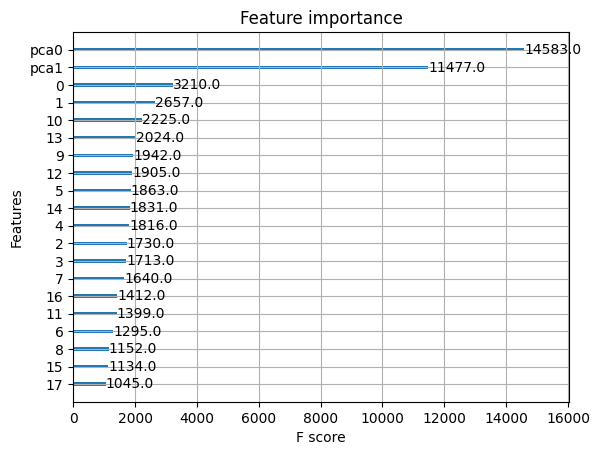

In [ ]:
from xgboost import plot_importance
plot_importance(regressor)

In [ ]:
prediction=regressor.predict(X_test)

In [ ]:
### evaluating on log
print("test MSE {} ".format(mean_squared_error(y_test,prediction)))
print("test RMSE {} ".format(math.sqrt(mean_squared_error(y_test,prediction))))

print("test MAE {} ".format((mean_absolute_error(y_test,prediction))))

test MSE 0.3337576366279019 
test RMSE 0.5777176097609471 
test MAE 0.4216910848676702 


In [ ]:
prediction_train=regressor.predict(X_train)

In [ ]:
### evaluating on log
print("train MSE {} ".format(mean_squared_error(y_train,prediction_train)))
print("train RMSE {} ".format(math.sqrt(mean_squared_error(y_train,prediction_train))))

print("train MAE {} ".format((mean_absolute_error(y_train,prediction_train))))

train MSE 0.2853413234188909 
train RMSE 0.5341734956162566 
train MAE 0.39784164253257887 


In [ ]:
###AIC
k = len(regressor.get_booster().get_fscore())
L = np.sum((y_train - prediction_train)**2)
AIC = 2*k - 2*np.log(L)

In [ ]:
AIC

20.86538436698058

Text(0, 0.5, 'Frequency')

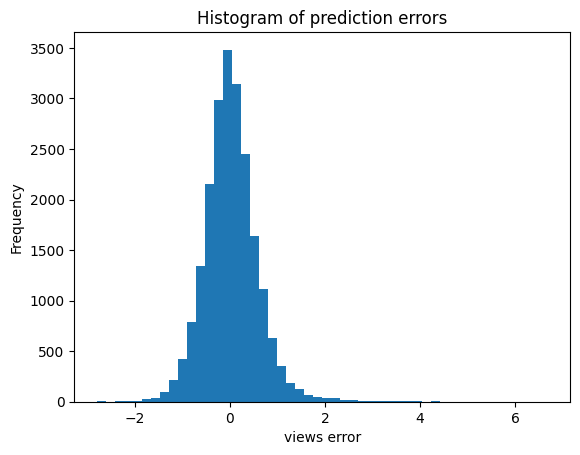

In [ ]:
## checking distribution of errors
import matplotlib.pyplot as plt
diff = y_test - prediction
diff.hist(bins = 50)
plt.title('Histogram of prediction errors')
plt.grid(False)
plt.xlabel('views error')
plt.ylabel('Frequency')

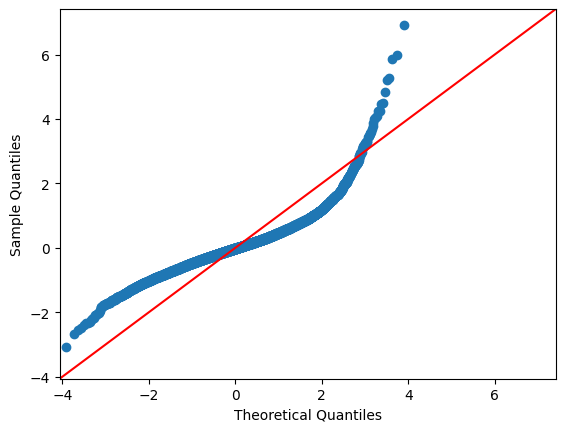

In [ ]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(diff, line ='45')
py.show()

In [ ]:
# ### Reversing the log operation
# y_test_real=np.exp(y_test)
# y_train_real= np.exp(y_train)
# prediction_real=np.exp(prediction)
# print("test MSE {} ".format(mean_squared_error(y_test_real,prediction_real)))
# print("test RMSE {} ".format(math.sqrt(mean_squared_error(y_test_real,prediction_real))))
# #Adj_r2 = 1 - (1-r2_score(y_test,prediction)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
# #print("test Adjusted R squared {} ".format(Adj_r2))

# print("test MAE {} ".format((mean_absolute_error(y_test_real,prediction_real))))

# print("train MSE {} ".format(mean_squared_error(y_train_real,prediction_train_real)))
# print("train RMSE {} ".format(math.sqrt(mean_squared_error(y_train_real,prediction_train_real))))
# #Adj_r2_train = 1 - (1-r2_score(y_train, prediction_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
# #print("train Adjusted R squared {} ".format(Adj_r2_train))
# print("train MAE {} ".format((mean_absolute_error(y_train_real,prediction_train_real))))